About DataSet

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [44]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [42]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
species = df["species"].value_counts().reset_index()
species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


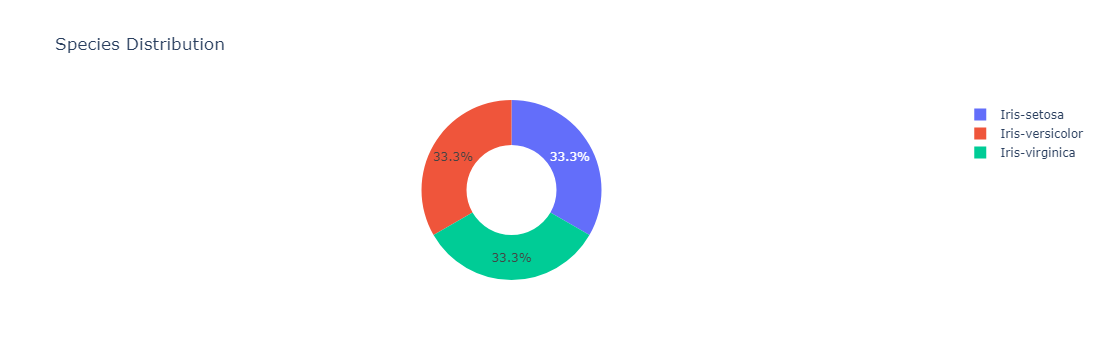

In [19]:
fig = px.pie(values=species['count'], names=['Iris-setosa','Iris-versicolor','Iris-virginica'], 
             title='Species Distribution', hole=0.5)

fig.show()

Preprocessing

In [20]:
X = df.drop("species",axis = True)

In [21]:
Y = df["species"]

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42 , test_size= 0.25)

In [26]:
svc = SVC()

In [40]:
svc_model = svc.fit(X_train, Y_train)
predic = svc_model.predict(X_test)
accuracy = accuracy_score(predic,Y_test)
print('Accuracy : ',accuracy)

Accuracy :  1.0


In [43]:
# Take input from the user
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Create a new input data point
new_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict the species using the trained model
predicted_species = svc_model.predict(new_input)

print("Predicted species:", predicted_species[0])

Enter sepal length:  5.9
Enter sepal width:  3.0
Enter petal length:  5.1
Enter petal width:  1.8


Predicted species: Iris-virginica
